In [62]:
%load_ext autoreload
%autoreload 2
import sys

# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
hp_df = pd.read_csv('/home/aevans/nwp_bias/src/machine_learning/data/comet_opt/shmaronshmevans_hyperparameter_tuning_for_lstm_new_view_table_data.csv')
hp_df

,Name,Tags,Server end time,File name,Duration,User Name,forecast_lead,sequence_length,Batch size,Learning Rate,Current Step,Loss,num_hidden_units,num_layers
0,faithful_sash_1618,orange,1.690980e+12,t2m_hrrr_fh2_orange.py,28790,shmaronshmevans,476,75,198,0.000753,5735,0.027163,175,7
1,keen_alpaca_9798,orange,1.690980e+12,t2m_hrrr_fh2_orange.py,28784,shmaronshmevans,476,75,198,0.000753,5676,0.033374,175,7
2,skilled_planarian_829,western_plat_hyperparams,1.690980e+12,t2m_hrrr_fh2_western_plateau.py,28797,shmaronshmevans,21,143,156,0.000741,6158,0.093445,125,8
3,thundering_bow_5898,western_plat_hyperparams,1.690980e+12,t2m_hrrr_fh2_western_plateau.py,28797,shmaronshmevans,21,143,156,0.000741,6062,0.109208,125,8
4,left_xerinae_5032,orange,1.690980e+12,t2m_hrrr_fh2_orange.py,28776,shmaronshmevans,352,335,805,0.000559,294,0.166179,709,4
5,regional_anaconda_7756,orange,1.690980e+12,t2m_hrrr_fh2_orange.py,28783,shmaronshmevans,663,84,254,0.000207,434,0.201180,697,8
6,sure_siding_6642,orange,1.690980e+12,t2m_hrrr_fh2_orange.py,28783,shmaronshmevans,663,84,254,0.000207,447,0.316585,697,8
7,mighty_skillet_1377,western_plat_hyperparams,1.690980e+12,t2m_hrrr_fh2_western_plateau.py,28798,shmaronshmevans,353,668,741,0.000185,266,0.361590,590,6
8,forthcoming_airport_7976,western_plat_hyperparams,1.690490e+12,t2m_hrrr_fh2_western_plateau.py,172809,shmaronshmevans,913,767,8,0.004198,1136,0.364906,8,57
9,great_whitefish_7716,NaN,1.690970e+12,t2m_hrrr_fh2_western_plateau.py,21601,shmaronshmevans,4,221,602,0.000142,1105,0.380637,120,18


In [65]:
hp_df = hp_df[hp_df['File name']=='t2m_hrrr_fh2_western_plateau.py']

In [66]:
len(hp_df['Name'])

11

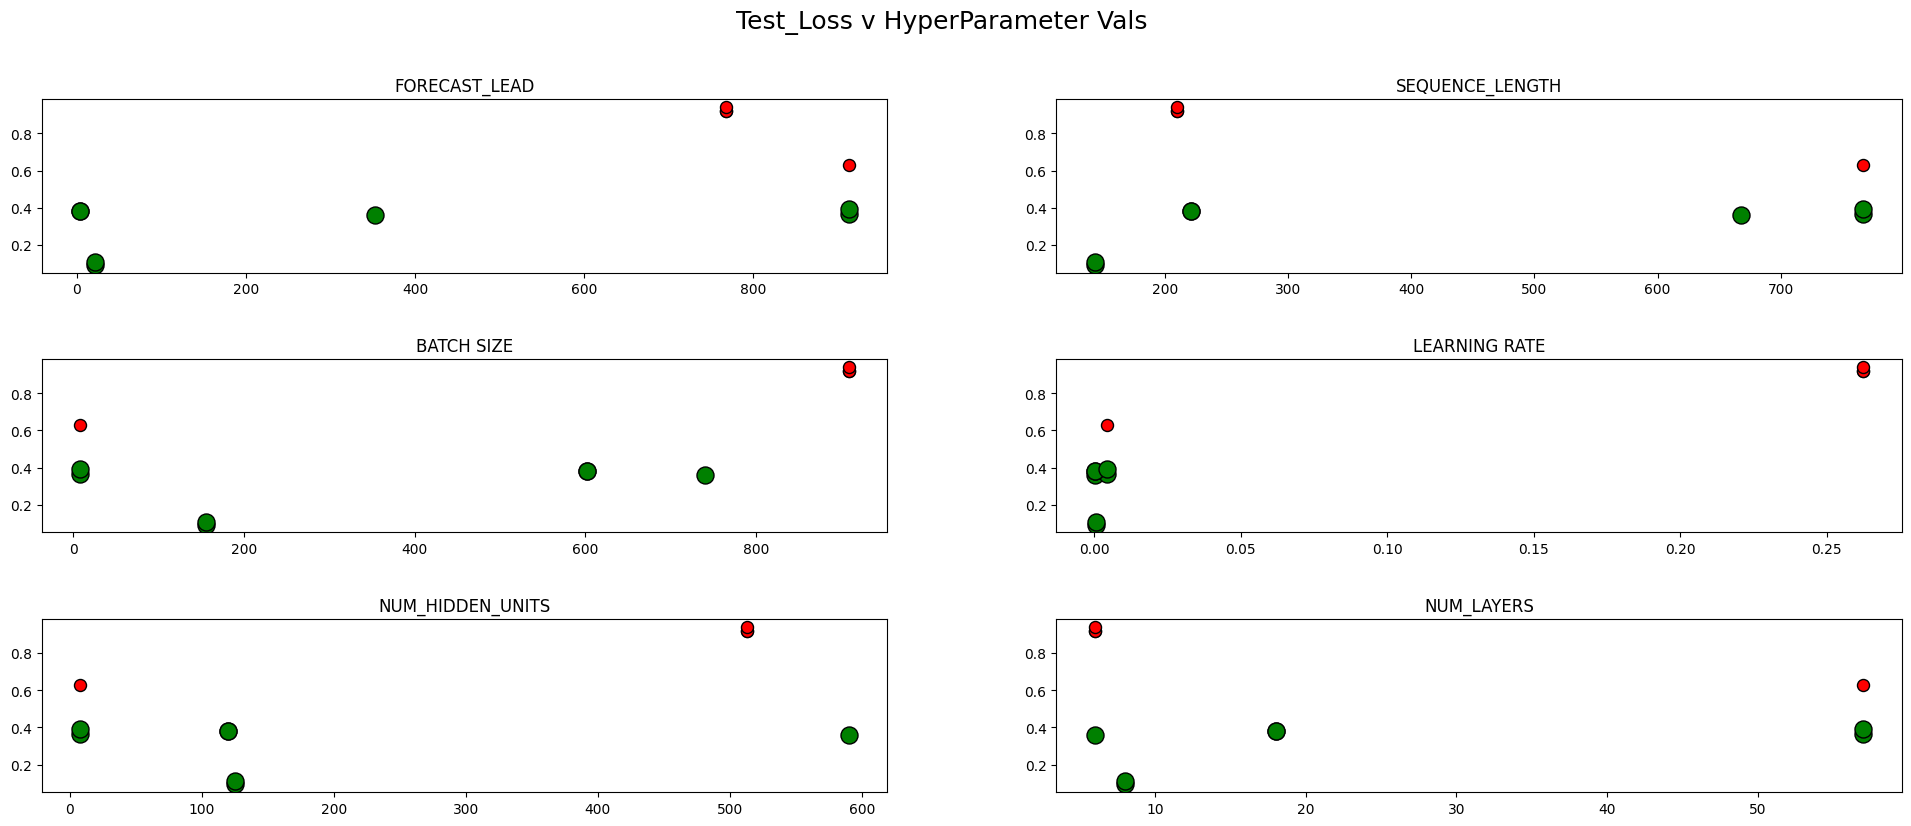

In [67]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(24, 9))
fig.suptitle("Test_Loss v HyperParameter Vals", fontsize=18)
plt.subplots_adjust(hspace=0.5)
hyper_params = ['forecast_lead', 'sequence_length', 'Batch size', 'Learning Rate', 'num_hidden_units', 'num_layers']
for c, ax in zip(hyper_params, axs.ravel()):
    # chart formatting
    ax = ax
    for i,_ in enumerate(hp_df['Loss']):
        if hp_df['Loss'].iloc[i] < 0.45:
            ax.scatter(hp_df[c].iloc[i], hp_df['Loss'].iloc[i],c='green', s= 150, edgecolors='black')
        else: 
            ax.scatter(hp_df[c].iloc[i], hp_df['Loss'].iloc[i], c='red', s= 75, edgecolors='black')
    ax.set_title(c.upper())
    ax.set_xlabel("")